In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive//Rain Prediction/rainfall_dataset.csv", index_col="date_time", parse_dates=True)

In [ ]:
df.shape

(14608, 5)

So there is no missing values

In [ ]:
df.head()

,rainfall,relative_humidity,temperature,wind_speed_SP,wind_speed_DR
date_time,,,,,
2018-01-01 00:00:00,0.0,98,16.5,2,8
2018-01-01 03:00:00,0.0,74,19.2,3,9
2018-01-01 06:00:00,0.0,57,25.7,3,12
2018-01-01 09:00:00,0.0,58,26.2,4,13
2018-01-01 12:00:00,0.0,77,23.0,0,0


In [ ]:
df = pd.DataFrame(df['rainfall'])

<Axes: xlabel='date_time'>

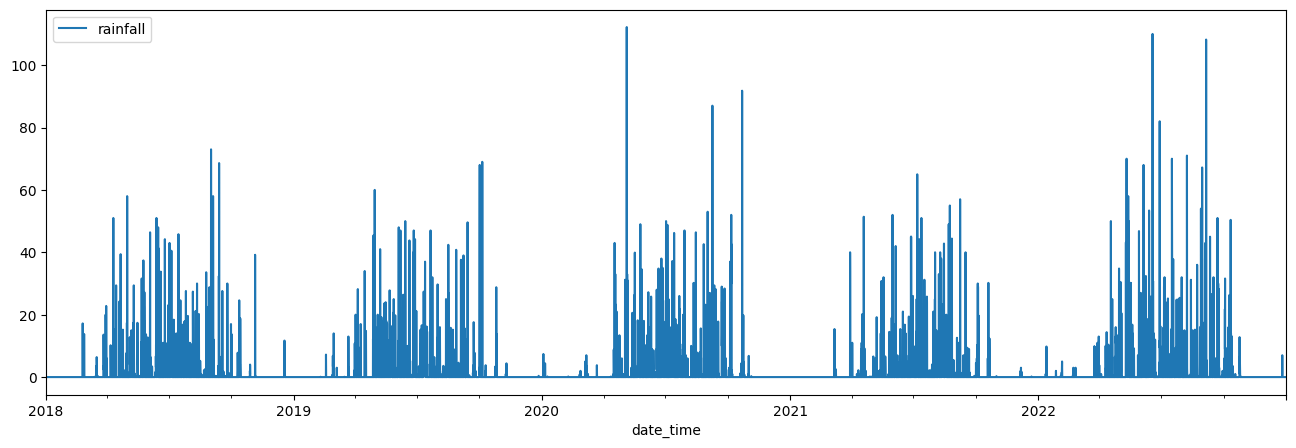

In [ ]:
df.plot(figsize=(16,5))

# Stationary Check

### 1st Check

In [ ]:
df['rollMean'] = df.rainfall.rolling(window=12).mean()
df['rollStd'] = df.rainfall.rolling(window=12).std()


<Axes: xlabel='date_time', ylabel='rainfall'>

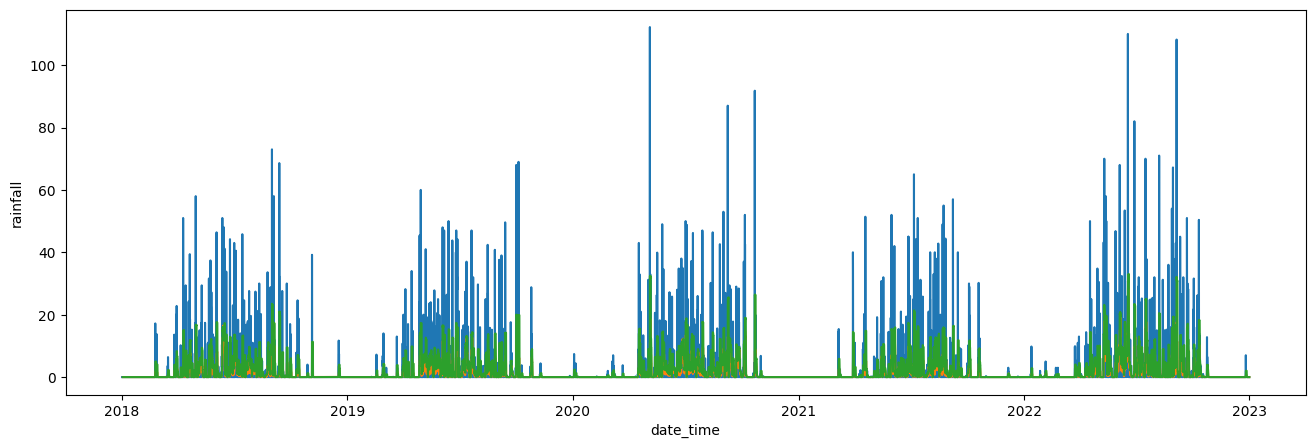

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(data=df, x=df.index, y=df.rainfall)
sns.lineplot(data=df, x=df.index, y=df.rollMean)
sns.lineplot(data=df, x=df.index, y=df.rollStd)

### 2nd Check

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfTest = adfuller(df['rainfall'], autolag='AIC')

In [ ]:
adfTest

(-13.827741392687896,
 7.693365875136622e-26,
 40,
 14567,
 {'1%': -3.4307989910554637,
  '5%': -2.861738434189995,
  '10%': -2.566875621804978},
 90916.85207541406)

In [ ]:
stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of observations used'])

In [ ]:
stats

Test Statistic                -1.382774e+01
p-value                        7.693366e-26
#lags used                     4.000000e+01
number of observations used    1.456700e+04
dtype: float64

In [ ]:
for key, values in adfTest[4].items():
  print('criticality',key,":", values)

criticality 1% : -3.4307989910554637
criticality 5% : -2.861738434189995
criticality 10% : -2.566875621804978


In [ ]:
stats['Test Statistic']

-13.827741392687896

Test Statistics < critcal value

then stationary

In [ ]:
if stats['Test Statistic'] < adfTest[4]['1%']:
  print('Data is Stationary')

if stats['Test Statistic'] < adfTest[4]['5%']:
  print('Data is Stationary')

if stats['Test Statistic'] < adfTest[4]['10%']:
  print('Data is Stationary')

Data is Stationary
Data is Stationary
Data is Stationary


In [ ]:
# test_stationarity function

In [ ]:
def test_stationarity(dataframe, var):
  dataframe['rollMean'] = dataframe[var].rolling(window=12).mean()
  dataframe['rollStd'] = dataframe[var].rolling(window=12).std()

  from statsmodels.tsa.stattools import adfuller
  adfTest = adfuller(dataframe[var], autolag='AIC')
  stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of observations used'])
  print(stats)

  for key, values in adfTest[4].items():
      print('criticality',key,":", values)

  plt.figure(figsize=(16,5))
  sns.lineplot(data=dataframe, x=dataframe.index, y=var)
  sns.lineplot(data=dataframe, x=dataframe.index, y=df.rollMean)
  sns.lineplot(data=dataframe, x=dataframe.index, y=df.rollStd)


Test Statistic                -1.382774e+01
p-value                        7.693366e-26
#lags used                     4.000000e+01
number of observations used    1.456700e+04
dtype: float64
criticality 1% : -3.4307989910554637
criticality 5% : -2.861738434189995
criticality 10% : -2.566875621804978


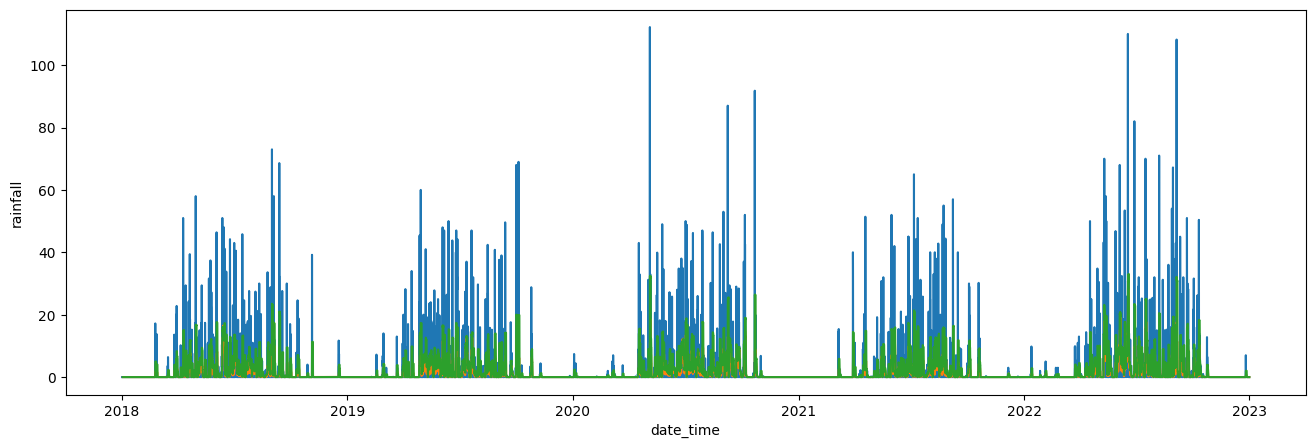

In [ ]:
test_stationarity(df, 'rainfall')

# If data is not stationary. Then follow this step

In [ ]:
#time shift

time_shift_df = df[['rainfall']]

In [ ]:
time_shift_df['shift'] = time_shift_df.rainfall.shift()
time_shift_df['shiftDiff'] = time_shift_df.rainfall - time_shift_df['shift']

Test Statistic                   -29.66203
p-value                            0.00000
#lags used                        40.00000
number of observations used    14566.00000
dtype: float64
criticality 1% : -3.430799021885494
criticality 5% : -2.8617384478144747
criticality 10% : -2.5668756290571437


ValueError: ignored

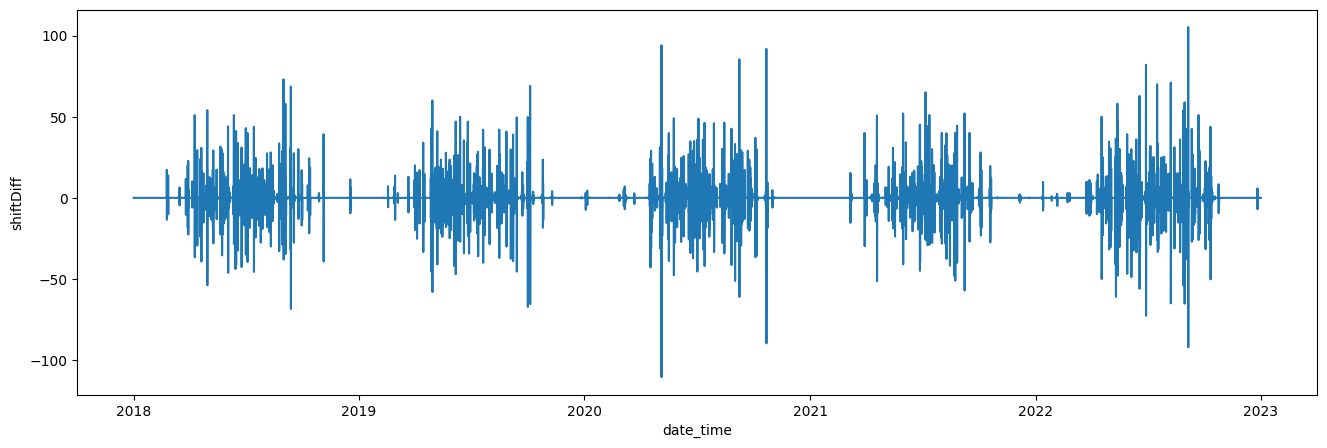

In [ ]:
test_stationarity(time_shift_df.dropna(), 'shiftDiff')

In [ ]:
# log
log_df = df[['rainfall']]
log_df['log'] = np.log(log_df['rainfall'])

In [ ]:
log_df.head()

,rainfall,log
date_time,,
2018-01-01 00:00:00,0.0,-inf
2018-01-01 03:00:00,0.0,-inf
2018-01-01 06:00:00,0.0,-inf
2018-01-01 09:00:00,0.0,-inf
2018-01-01 12:00:00,0.0,-inf


In [ ]:
test_stationarity(log_df, 'log')

LinAlgError: ignored

In [ ]:
# sqrt
sqrt_df = df[['rainfall']]
sqrt_df['sqrt'] = np.sqrt(sqrt_df['rainfall'])
sqrt_df.head()

,rainfall,sqrt
date_time,,
2018-01-01 00:00:00,0.0,0.0
2018-01-01 03:00:00,0.0,0.0
2018-01-01 06:00:00,0.0,0.0
2018-01-01 09:00:00,0.0,0.0
2018-01-01 12:00:00,0.0,0.0


Test Statistic                -1.243295e+01
p-value                        3.903470e-23
#lags used                     3.900000e+01
number of observations used    1.456800e+04
dtype: float64
criticality 1% : -3.430798960229667
criticality 5% : -2.861738420567386
criticality 10% : -2.5668756145538083


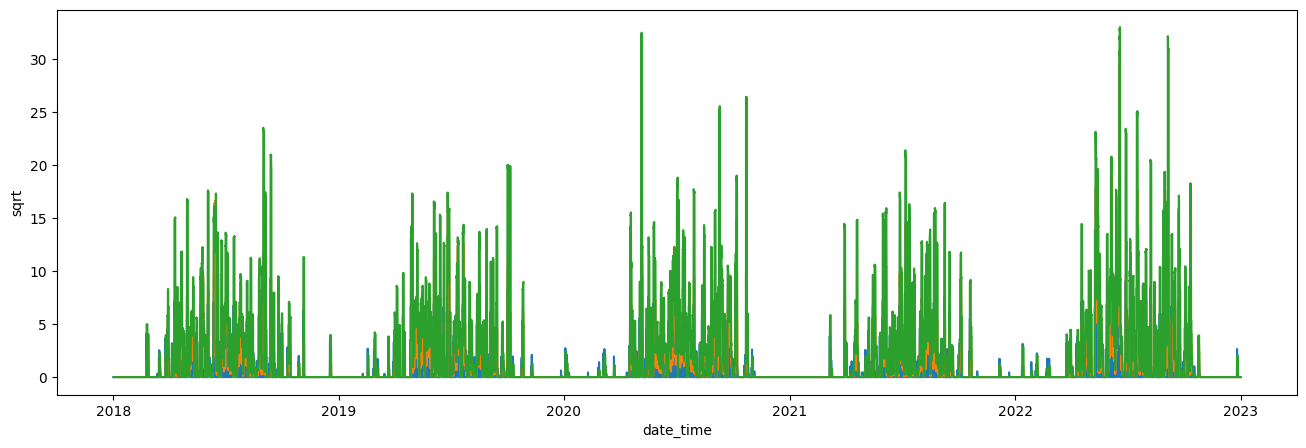

In [ ]:
test_stationarity(sqrt_df, 'sqrt')

In [ ]:
# cbrt
cbrt_df = df[['rainfall']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['rainfall'])
cbrt_df.head()

,rainfall,cbrt
date_time,,
2018-01-01 00:00:00,0.0,0.0
2018-01-01 03:00:00,0.0,0.0
2018-01-01 06:00:00,0.0,0.0
2018-01-01 09:00:00,0.0,0.0
2018-01-01 12:00:00,0.0,0.0


Test Statistic                -1.186753e+01
p-value                        6.621136e-22
#lags used                     3.900000e+01
number of observations used    1.456800e+04
dtype: float64
criticality 1% : -3.430798960229667
criticality 5% : -2.861738420567386
criticality 10% : -2.5668756145538083


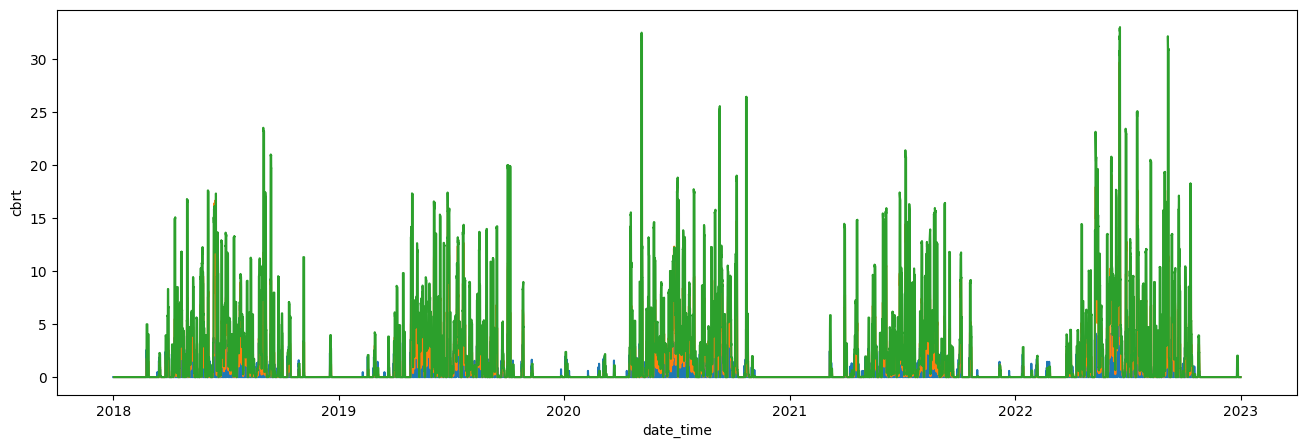

In [ ]:
test_stationarity(cbrt_df, 'cbrt')

In [ ]:
# log + sqrt

# https://www.youtube.com/watch?v=O5pataOw33Y&t=2956s


In [ ]:
# log + cbrt

# https://www.youtube.com/watch?v=O5pataOw33Y&t=2956s